In [19]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define emotion mapping for RAVDESS
emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# Initialize lists to store data
data = []

# Define RAVDESS directory path
ravdess_path = r"C:\Users\vinna\Downloads\Projects\SER\ravdess"

# Parse filenames and load data
for actor_folder in os.listdir(ravdess_path):
    actor_path = os.path.join(ravdess_path, actor_folder)
    
    if os.path.isdir(actor_path):  # Check if it is a directory
        for file_name in os.listdir(actor_path):
            if file_name.endswith(".wav"):
                # Parse file name for metadata
                parts = file_name.split("-")
                emotion_code = parts[2]
                intensity = parts[3]
                
                # Map to emotion label
                emotion_label = emotion_map.get(emotion_code, "unknown")
                
                # Get file path and append metadata to data list
                file_path = os.path.join(actor_path, file_name)
                data.append([file_path, emotion_label, intensity])

# Create DataFrame from parsed data
ravdess_df = pd.DataFrame(data, columns=["File_Path", "Emotion", "Intensity"])

# Show the first few rows
print(ravdess_df.head())


                                           File_Path  Emotion Intensity
0  C:\Users\vinna\Downloads\Projects\SER\ravdess\...  neutral        01
1  C:\Users\vinna\Downloads\Projects\SER\ravdess\...  neutral        01
2  C:\Users\vinna\Downloads\Projects\SER\ravdess\...  neutral        01
3  C:\Users\vinna\Downloads\Projects\SER\ravdess\...  neutral        01
4  C:\Users\vinna\Downloads\Projects\SER\ravdess\...     calm        01


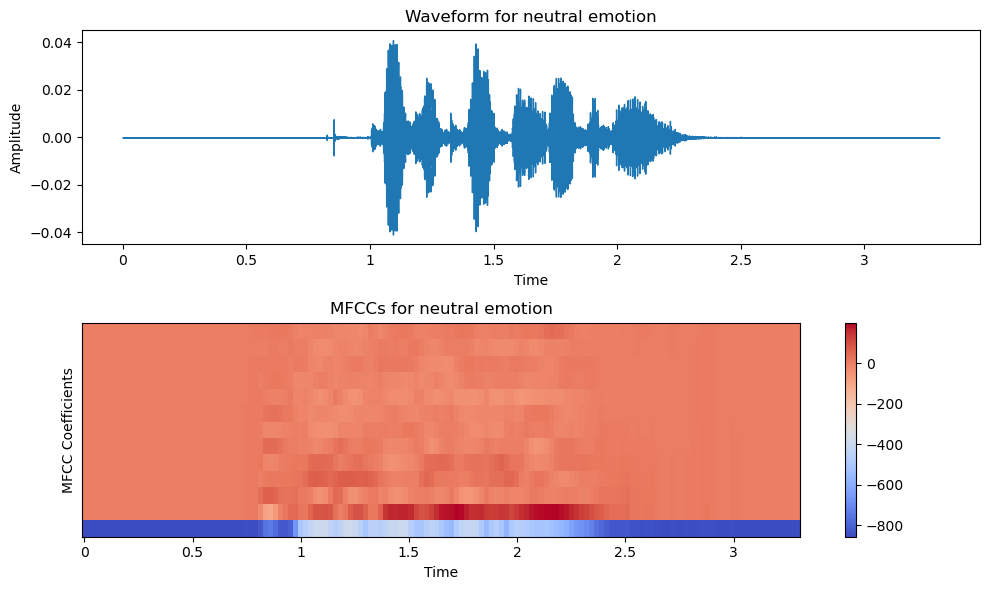

In [28]:
# Function to plot waveform and MFCCs
def plot_waveform_and_mfcc(file_path, emotion):
    # Load the audio file
    signal, sr = librosa.load(file_path)
    
    # Plot waveform
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.title(f"Waveform for {emotion} emotion")
    librosa.display.waveshow(signal, sr=sr)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    
    # Plot MFCCs
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)  # Updated syntax
    plt.subplot(2, 1, 2)
    plt.title(f"MFCCs for {emotion} emotion")
    librosa.display.specshow(mfccs, sr=sr, x_axis="time")
    plt.colorbar()
    plt.ylabel("MFCC Coefficients")
    plt.xlabel("Time")
    
    plt.tight_layout()
    plt.show()

# Select a sample to visualize
sample_file = ravdess_df.loc[0, "File_Path"]
sample_emotion = ravdess_df.loc[0, "Emotion"]
plot_waveform_and_mfcc(sample_file, sample_emotion)


DataFrame Shape: (1440, 3)

Emotion Distribution:
 Emotion
calm         192
happy        192
sad          192
angry        192
fearful      192
disgust      192
surprised    192
neutral       96
Name: count, dtype: int64


C:\Users\vinna\AppData\Local\Temp\ipykernel_32632\3243358421.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=ravdess_df["Emotion"], order=ravdess_df["Emotion"].value_counts().index, palette="viridis")


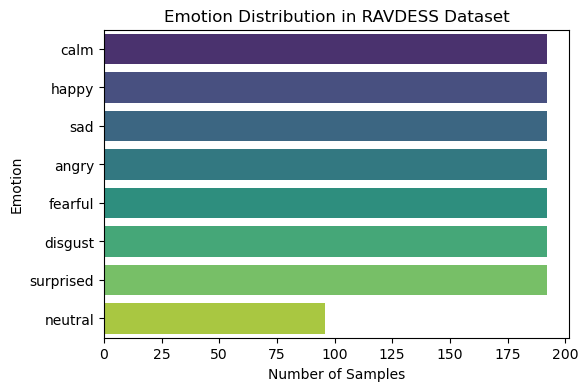

In [102]:
# Show basic statistics of the RAVDESS dataset
print("DataFrame Shape:", ravdess_df.shape)
print("\nEmotion Distribution:\n", ravdess_df["Emotion"].value_counts())

# Visualize the distribution of emotions
plt.figure(figsize=(6, 4))
sns.countplot(y=ravdess_df["Emotion"], order=ravdess_df["Emotion"].value_counts().index, palette="viridis")
plt.title("Emotion Distribution in RAVDESS Dataset")
plt.xlabel("Number of Samples")
plt.ylabel("Emotion")
plt.show()


In [72]:
import pandas as pd

# Function to get a random emotion file from specified emotions
def get_random_emotion_file(df, emotions):
    emotion_df = df[df['Emotion'].isin(emotions)]
    return emotion_df.sample().iloc[0] if not emotion_df.empty else None

# Specify the emotions you want to include
emotions = ["calm", "happy", "sad", "angry", "fearful", "disgust", "surprised", "neutral"]

# Get a random emotion file
random_file = get_random_emotion_file(ravdess_df, emotions)
print(random_file)


File_Path    C:\Users\vinna\Downloads\Projects\SER\ravdess\...
Emotion                                                    sad
Intensity                                                   02
Name: 86, dtype: object


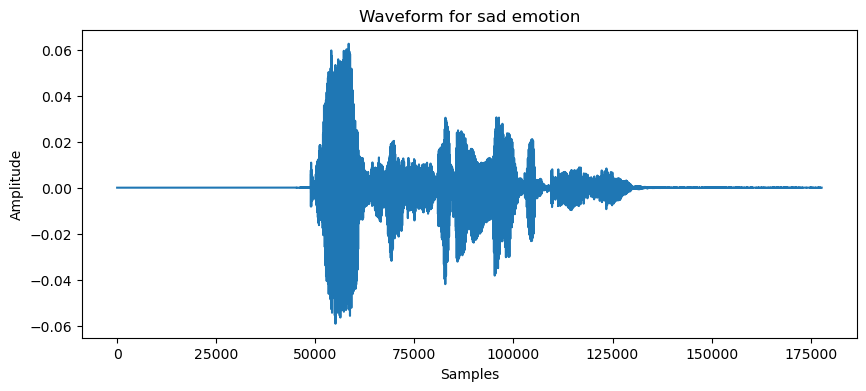

In [82]:
# Plot Waveform
def plot_waveform(file_path, emotion):
    signal, sr = librosa.load(file_path, sr=None)
    plt.figure(figsize=(10, 4))
    plt.plot(signal)
    plt.title(f'Waveform for {emotion} emotion')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.show()

# Plot waveform for the random neutral file
if random_file is not None:
    sample_file = random_file['File_Path']
    sample_emotion = random_file['Emotion']
    plot_waveform(sample_file, sample_emotion)
else:
    print("No neutral emotion files found.")


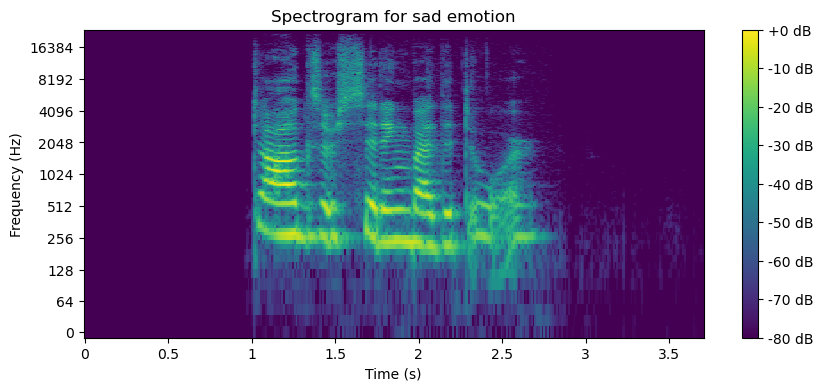

In [86]:
# Plot Spectrogram
def plot_spectrogram(file_path, emotion):
    signal, sr = librosa.load(file_path, sr=None)
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram for {emotion} emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Plot spectrogram for the random  file
if random_file is not None:
    plot_spectrogram(sample_file, sample_emotion)


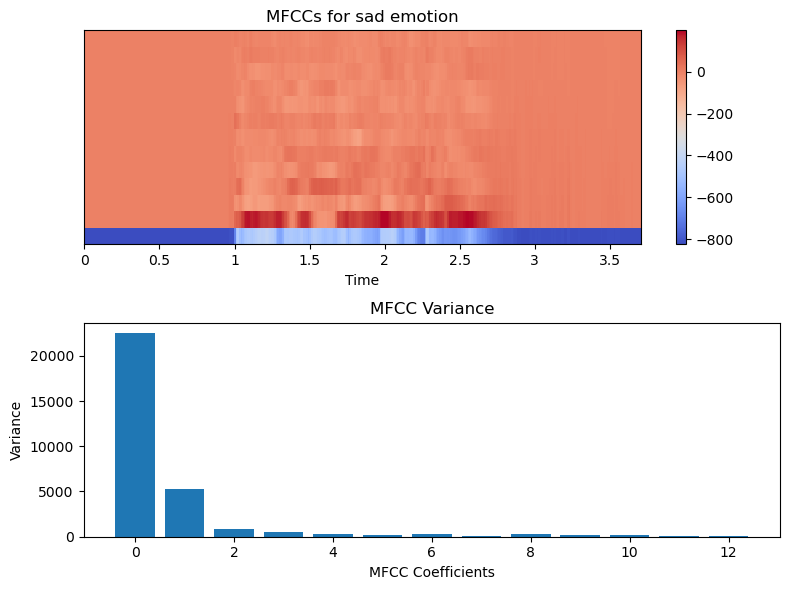

In [92]:
# Plot MFCCs
def plot_mfcc(file_path, emotion):
    signal, sr = librosa.load(file_path, sr=None)
    # Calculate MFCCs using the new parameter structure
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)

    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.title(f'MFCCs for {emotion} emotion')
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()

    # Plot variance of MFCCs
    plt.subplot(2, 1, 2)
    mfccs_variance = np.var(mfccs, axis=1)
    plt.bar(range(len(mfccs_variance)), mfccs_variance)
    plt.title('MFCC Variance')
    plt.xlabel('MFCC Coefficients')
    plt.ylabel('Variance')

    plt.tight_layout()
    plt.show()

# Plot MFCCs for the random neutral file
if random_file is not None:
    plot_mfcc(sample_file, sample_emotion)


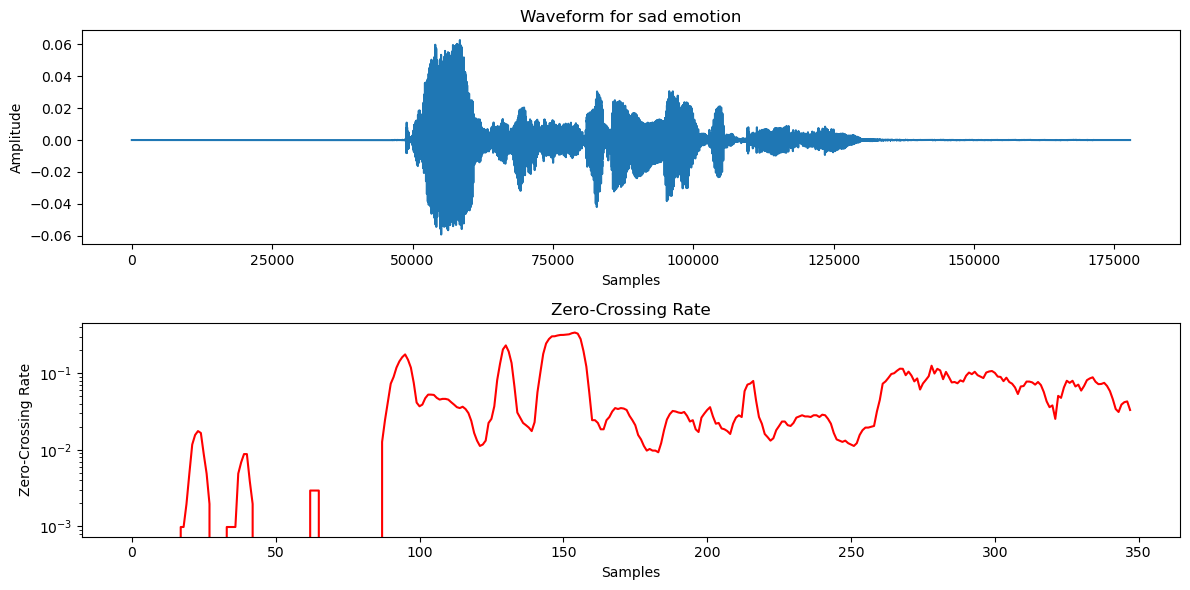

In [88]:
# Plot Zero-Crossing Rate
def plot_zero_crossing_rate(file_path, emotion):
    signal, sr = librosa.load(file_path, sr=None)
    zcr = librosa.feature.zero_crossing_rate(signal)

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(signal)
    plt.title(f'Waveform for {emotion} emotion')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')

    plt.subplot(2, 1, 2)
    plt.semilogy(zcr[0], label='Zero-Crossing Rate', color='r')
    plt.ylabel('Zero-Crossing Rate')
    plt.title('Zero-Crossing Rate')
    plt.xlabel('Samples')

    plt.tight_layout()
    plt.show()

# Plot Zero-Crossing Rate for the random neutral file
if random_file is not None:
    plot_zero_crossing_rate(sample_file, sample_emotion)


In [108]:
import os
import librosa
import numpy as np

# Function to extract features from audio files
def extract_features(file_path):
    # Load audio file
    signal, sr = librosa.load(file_path, sr=None)
    
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)  # Corrected here
    mfccs_mean = np.mean(mfccs, axis=1)  # Mean of MFCCs over time
    return mfccs_mean

# Extract features for the entire dataset
X = []
y = []

for index, row in ravdess_df.iterrows():
    features = extract_features(row["File_Path"])
    X.append(features)
    y.append(row["Emotion"])

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print("Feature shape:", X.shape)
print("Labels shape:", y.shape)


Feature shape: (1440, 13)
Labels shape: (1440,)


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training feature shape: (1152, 13)
Testing feature shape: (288, 13)
Training labels shape: (1152,)
Testing labels shape: (288,)


In [112]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Create an SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.4340277777777778
              precision    recall  f1-score   support

       angry       0.73      0.57      0.64        42
        calm       0.43      0.75      0.55        44
     disgust       0.42      0.47      0.44        32
     fearful       0.40      0.53      0.46        32
       happy       0.46      0.35      0.40        34
     neutral       0.22      0.10      0.14        20
         sad       0.31      0.28      0.29        39
   surprised       0.37      0.24      0.29        45

    accuracy                           0.43       288
   macro avg       0.42      0.41      0.40       288
weighted avg       0.43      0.43      0.42       288



In [114]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.5486111111111112
              precision    recall  f1-score   support

       angry       0.76      0.67      0.71        42
        calm       0.53      0.75      0.62        44
     disgust       0.47      0.62      0.53        32
     fearful       0.60      0.66      0.63        32
       happy       0.52      0.47      0.49        34
     neutral       0.50      0.25      0.33        20
         sad       0.53      0.49      0.51        39
   surprised       0.47      0.36      0.41        45

    accuracy                           0.55       288
   macro avg       0.55      0.53      0.53       288
weighted avg       0.55      0.55      0.54       288



In [116]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.5659722222222222
              precision    recall  f1-score   support

       angry       0.71      0.71      0.71        42
        calm       0.71      0.82      0.76        44
     disgust       0.53      0.62      0.57        32
     fearful       0.48      0.50      0.49        32
       happy       0.50      0.44      0.47        34
     neutral       0.39      0.55      0.46        20
         sad       0.46      0.33      0.39        39
   surprised       0.58      0.49      0.53        45

    accuracy                           0.57       288
   macro avg       0.55      0.56      0.55       288
weighted avg       0.56      0.57      0.56       288



In [118]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.4618055555555556
              precision    recall  f1-score   support

       angry       0.86      0.71      0.78        42
        calm       0.44      0.68      0.54        44
     disgust       0.38      0.44      0.41        32
     fearful       0.45      0.47      0.46        32
       happy       0.42      0.44      0.43        34
     neutral       0.71      0.25      0.37        20
         sad       0.32      0.31      0.31        39
   surprised       0.35      0.27      0.30        45

    accuracy                           0.46       288
   macro avg       0.49      0.45      0.45       288
weighted avg       0.48      0.46      0.46       288



In [120]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_accuracy)
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.4930555555555556
              precision    recall  f1-score   support

       angry       0.82      0.67      0.74        42
        calm       0.56      0.70      0.63        44
     disgust       0.39      0.47      0.43        32
     fearful       0.47      0.56      0.51        32
       happy       0.44      0.56      0.49        34
     neutral       0.42      0.25      0.31        20
         sad       0.39      0.31      0.34        39
   surprised       0.38      0.31      0.34        45

    accuracy                           0.49       288
   macro avg       0.48      0.48      0.47       288
weighted avg       0.50      0.49      0.49       288



In [126]:
import pandas as pd

# Define a function to evaluate different models and store metrics in a DataFrame
def evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42)
    }

    results = []

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Generate classification report
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Append results
        results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": report["weighted avg"]["precision"],
            "Recall": report["weighted avg"]["recall"],
            "F1 Score": report["weighted avg"]["f1-score"],
            "Support": report["weighted avg"]["support"]
        })

    return pd.DataFrame(results)

# Evaluate models and get the results DataFrame
results_df = evaluate_models(X_train, y_train, X_test, y_test)

# Display the results DataFrame
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score  Support
0  Logistic Regression  0.461806   0.481652  0.461806  0.457844    288.0
1        Random Forest  0.548611   0.550677  0.548611  0.540582    288.0
2                  KNN  0.565972   0.564003  0.565972  0.560697    288.0
3    Gradient Boosting  0.493056   0.495341  0.493056  0.487642    288.0


In [128]:
from sklearn.model_selection import GridSearchCV

# Define the model
knn = KNeighborsClassifier()

# Set the parameters to search
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

# Create a GridSearchCV object
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, scoring='accuracy', cv=5)

# Fit to the data
grid_knn.fit(X_train, y_train)

# Get the best parameters and score
best_knn_params = grid_knn.best_params_
best_knn_score = grid_knn.best_score_

print(f"Best KNN Params: {best_knn_params}")
print(f"Best KNN Score: {best_knn_score}")


Best KNN Params: {'n_neighbors': 3, 'weights': 'distance'}
Best KNN Score: 0.5894635798983625


In [130]:
# Define the model
rf = RandomForestClassifier()

# Set the parameters to search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=5)

# Fit to the data
grid_rf.fit(X_train, y_train)

# Get the best parameters and score
best_rf_params = grid_rf.best_params_
best_rf_score = grid_rf.best_score_

print(f"Best Random Forest Params: {best_rf_params}")
print(f"Best Random Forest Score: {best_rf_score}")


Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Score: 0.5738302277432712


In [131]:
from sklearn.model_selection import cross_val_score

# Cross-validate KNN with best parameters
best_knn = KNeighborsClassifier(**best_knn_params)
knn_cv_scores = cross_val_score(best_knn, X, y, cv=5)

# Cross-validate Random Forest with best parameters
best_rf = RandomForestClassifier(**best_rf_params)
rf_cv_scores = cross_val_score(best_rf, X, y, cv=5)

print(f"KNN Cross-Validation Scores: {knn_cv_scores}")
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")


KNN Cross-Validation Scores: [0.23611111 0.29166667 0.32291667 0.29861111 0.22916667]
Random Forest Cross-Validation Scores: [0.36458333 0.36111111 0.39236111 0.38888889 0.35416667]


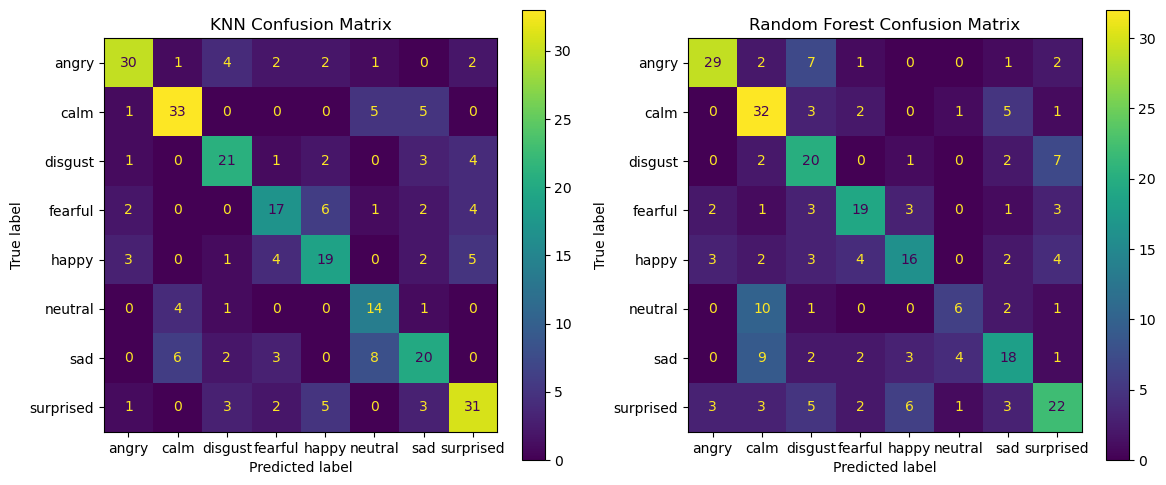

In [132]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Fit the best models to the training data
best_knn.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

# Predict on test data
knn_predictions = best_knn.predict(X_test)
rf_predictions = best_rf.predict(X_test)

# Create confusion matrices
knn_cm = confusion_matrix(y_test, knn_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KNN confusion matrix
ConfusionMatrixDisplay(knn_cm, display_labels=best_knn.classes_).plot(ax=axes[0])
axes[0].set_title('KNN Confusion Matrix')

# Random Forest confusion matrix
ConfusionMatrixDisplay(rf_cm, display_labels=best_rf.classes_).plot(ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()


In [136]:
# Define the mapping for stress classification
stress_mapping = {
    "01": "non-stress",  # neutral
    "02": "non-stress",  # calm
    "03": "non-stress",  # happy
    "04": "non-stress",  # sad
    "05": "stress",      # angry
    "06": "stress",      # fearful
    "07": "non-stress",  # disgust
    "08": "non-stress"   # surprised
}

# Update the DataFrame for binary classification
ravdess_df['Stress'] = ravdess_df['Emotion'].map(stress_mapping)

# Filter the DataFrame for only stress and non-stress
ravdess_binary_df = ravdess_df[ravdess_df['Stress'].notnull()]

# Check the distribution
print(ravdess_binary_df['Stress'].value_counts())


Series([], Name: count, dtype: int64)


In [138]:
def extract_features_binary(file_path):
    signal, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(signal, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

# Extract features and labels
X = []
y = []

for index, row in ravdess_binary_df.iterrows():
    features = extract_features_binary(row["File_Path"])
    X.append(features)
    y.append(row["Stress"])

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Print shapes
print(f"Feature shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Feature shape: (0,)
Labels shape: (0,)


In [140]:
# Check the original DataFrame to see available emotions
print(ravdess_df['Emotion'].value_counts())


Emotion
calm         192
happy        192
sad          192
angry        192
fearful      192
disgust      192
surprised    192
neutral       96
Name: count, dtype: int64


In [144]:
# Define the mapping for stress classification
stress_mapping = {
    "01": "non-stress",  # neutral
    "02": "non-stress",  # calm
    "03": "non-stress",  # happy
    "04": "stress",      # sad
    "05": "stress",      # angry
    "06": "stress",      # fearful
    "07": "stress",      # disgust
    "08": "non-stress"   # surprised
}


In [148]:
import os
import pandas as pd

# Define emotion mapping for stress classification
stress_mapping = {
    "01": "non-stress",  # neutral
    "02": "non-stress",  # calm
    "03": "non-stress",  # happy
    "04": "stress",      # sad
    "05": "stress",      # angry
    "06": "stress",      # fearful
    "07": "stress",      # disgust
    "08": "non-stress"   # surprised
}

# Initialize lists to store data
data = []

# Define RAVDESS directory path
ravdess_path = r"C:\Users\vinna\Downloads\Projects\SER\ravdess"

# Parse filenames and load data
for actor_folder in os.listdir(ravdess_path):
    actor_path = os.path.join(ravdess_path, actor_folder)
    
    if os.path.isdir(actor_path):  # Check if it is a directory
        for file_name in os.listdir(actor_path):
            if file_name.endswith(".wav"):
                # Parse file name for metadata
                parts = file_name.split("-")
                emotion_code = parts[2]
                
                # Map to stress label
                stress_label = stress_mapping.get(emotion_code, None)  # None if not found
                
                # Only append if we have a valid stress label
                if stress_label is not None:
                    file_path = os.path.join(actor_path, file_name)
                    data.append([file_path, emotion_code, stress_label])

# Create DataFrame from parsed data
ravdess_df = pd.DataFrame(data, columns=["File_Path", "Emotion_Code", "Stress"])

# Show the first few rows
print("DataFrame Shape:", ravdess_df.shape)
print("\nDataFrame Preview:")
print(ravdess_df.head())

# Check the counts of stress and non-stress
print("\nStress Classification Counts:")
print(ravdess_df['Stress'].value_counts())


DataFrame Shape: (1440, 3)

DataFrame Preview:
                                           File_Path Emotion_Code      Stress
0  C:\Users\vinna\Downloads\Projects\SER\ravdess\...           01  non-stress
1  C:\Users\vinna\Downloads\Projects\SER\ravdess\...           01  non-stress
2  C:\Users\vinna\Downloads\Projects\SER\ravdess\...           01  non-stress
3  C:\Users\vinna\Downloads\Projects\SER\ravdess\...           01  non-stress
4  C:\Users\vinna\Downloads\Projects\SER\ravdess\...           02  non-stress

Stress Classification Counts:
Stress
stress        768
non-stress    672
Name: count, dtype: int64


In [152]:
import librosa
import numpy as np

def extract_features(file_path):
    # Load the audio file
    signal, sr = librosa.load(file_path, sr=None)

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)  # y is now a keyword argument
    mfccs_mean = np.mean(mfccs.T, axis=0)  # Mean of MFCCs over time
    return mfccs_mean

# Initialize lists for features and labels
X = []
y = []

# Extract features for each file in the DataFrame
for index, row in ravdess_df.iterrows():
    features = extract_features(row["File_Path"])
    X.append(features)
    y.append(row["Stress"])

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print("Feature shape:", X.shape)
print("Labels shape:", y.shape)


Feature shape: (1440, 13)
Labels shape: (1440,)


In [154]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training feature shape: (1152, 13)
Testing feature shape: (288, 13)
Training labels shape: (1152,)
Testing labels shape: (288,)


In [160]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models

# Assuming you have already extracted features and labels as X and y
# X shape: (1440, 13)
# y shape: (1440,)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Reshape data for CNN (assuming MFCCs are used as features)
X_train = X_train.reshape(X_train.shape[0], 13, 1, 1)  # Adjust as necessary
X_test = X_test.reshape(X_test.shape[0], 13, 1, 1)      # Adjust as necessary

# Define the CNN model
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 1), activation='relu', input_shape=(13, 1, 1)))  # Adjust input shape if necessary
cnn_model.add(layers.MaxPooling2D((2, 1)))
cnn_model.add(layers.Conv2D(64, (3, 1), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 1)))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(2, activation='softmax'))  # 2 classes: stress and non-stress

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f'CNN Test accuracy: {cnn_test_accuracy}')

# Save the trained model
cnn_model.save("cnn_stress_classification_model.h5")


Epoch 1/100


C:\Users\vinna\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5167 - loss: 4.1430 - val_accuracy: 0.4545 - val_loss: 1.3148
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5489 - loss: 1.0434 - val_accuracy: 0.5368 - val_loss: 0.6694
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6028 - loss: 0.6751 - val_accuracy: 0.5628 - val_loss: 0.7195
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5858 - loss: 0.6736 - val_accuracy: 0.6061 - val_loss: 0.6552
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6006 - loss: 0.6656 - val_accuracy: 0.5671 - val_loss: 0.6672
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5976 - loss: 0.6984 - val_accuracy: 0.6017 - val_loss: 0.8693
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5707 - loss: 0.8417 - val_accuracy: 0.5931 - val_loss: 0.6422
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6097 - loss: 0.6608 - val_accuracy: 0.6580 - val_loss: 0.

CNN Test accuracy: 0.7152777910232544


In [163]:
# Ensure you have the previous imports and data preparation code here

# Reshape data for LSTM (samples, time steps, features)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, 13)  # 1 time step, 13 features
X_test_lstm = X_test.reshape(X_test.shape[0], 1, 13)      # 1 time step, 13 features

# Define the LSTM model
lstm_model = models.Sequential()
lstm_model.add(layers.LSTM(64, input_shape=(1, 13), return_sequences=True))
lstm_model.add(layers.LSTM(32))
lstm_model.add(layers.Dense(64, activation='relu'))
lstm_model.add(layers.Dense(2, activation='softmax'))  # 2 classes: stress and non-stress

# Compile the model
lstm_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(X_test_lstm, y_test, verbose=2)
print(f'LSTM Test accuracy: {lstm_test_accuracy}')

# Save the trained model
lstm_model.save("lstm_stress_classification_model.h5")


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.5041 - loss: 0.6933 - val_accuracy: 0.5844 - val_loss: 0.6840
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5380 - loss: 0.6880 - val_accuracy: 0.5628 - val_loss: 0.6821
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5503 - loss: 0.6836 - val_accuracy: 0.5887 - val_loss: 0.6690
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5709 - loss: 0.6788 - val_accuracy: 0.5887 - val_loss: 0.6587
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5946 - loss: 0.6605 - val_accuracy: 0.5758 - val_loss: 0.6543
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5696 - loss: 0.6946 - val_accuracy: 0.6017 - val_loss: 0.6577
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5809 - loss: 0.6737 - val_accuracy: 0.5801 - val_loss: 0.6497
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6003 - loss: 0.6672 - val_accuracy: 0.6190 - 

LSTM Test accuracy: 0.6631944179534912


In [166]:
# Ensure you have the previous imports and data preparation code here

# Reshape data for LSTM (samples, time steps, features)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, 13)  # 1 time step, 13 features
X_test_lstm = X_test.reshape(X_test.shape[0], 1, 13)      # 1 time step, 13 features

# Define the LSTM model
lstm_model = models.Sequential()
lstm_model.add(layers.LSTM(64, input_shape=(1, 13), return_sequences=True))
lstm_model.add(layers.LSTM(32))
lstm_model.add(layers.Dense(64, activation='relu'))
lstm_model.add(layers.Dense(2, activation='softmax'))  # 2 classes: stress and non-stress

# Compile the model
lstm_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(X_test_lstm, y_test, verbose=2)
print(f'LSTM Test accuracy: {lstm_test_accuracy}')

# Save the trained model
lstm_model.save("lstm_stress_classification_model.h5")


C:\Users\vinna\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.5134 - loss: 0.6937 - val_accuracy: 0.5844 - val_loss: 0.6818
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5307 - loss: 0.6894 - val_accuracy: 0.5844 - val_loss: 0.6778
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5265 - loss: 0.6866 - val_accuracy: 0.6147 - val_loss: 0.6674
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6067 - loss: 0.6696 - val_accuracy: 0.5931 - val_loss: 0.6582
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5262 - loss: 0.6958 - val_accuracy: 0.5844 - val_loss: 0.6584
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5797 - loss: 0.6724 - val_accuracy: 0.5887 - val_loss: 0.6562
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6021 - loss: 0.6612 - val_accuracy: 0.6061 - val_loss: 0.6550
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5992 - loss: 0.6577 - val_accuracy: 0.6147 

LSTM Test accuracy: 0.6597222089767456


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
CNN Classification Report:
              precision    recall  f1-score   support

  non-stress       0.72      0.69      0.71       143
      stress       0.71      0.74      0.72       145

    accuracy                           0.72       288
   macro avg       0.72      0.72      0.72       288
weighted avg       0.72      0.72      0.72       288



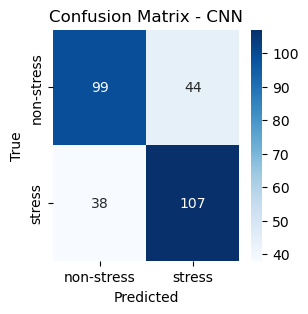

In [176]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the CNN model
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)

# Print classification report
print("CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn, target_names=label_encoder.classes_))

# Confusion matrix
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  
LSTM Classification Report:
              precision    recall  f1-score   support

  non-stress       0.66      0.66      0.66       143
      stress       0.66      0.66      0.66       145

    accuracy                           0.66       288
   macro avg       0.66      0.66      0.66       288
weighted avg       0.66      0.66      0.66       288



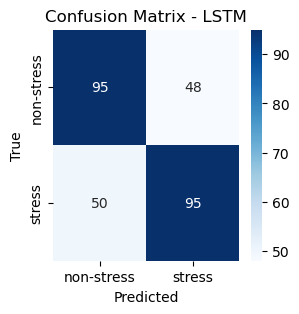

In [172]:
# Predict using the LSTM model
y_pred_lstm = np.argmax(lstm_model.predict(X_test_lstm), axis=1)

# Print classification report
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm, target_names=label_encoder.classes_))

# Confusion matrix
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - LSTM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
